In [11]:
#loading the MASS package
#boston data set

library(MASS)

In [2]:
data(package="MASS")
boston<-Boston
dim(boston)
names(boston)

[1] 506  14

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [2]:
#Load Random Forest Package

require(randomForest)

Loading required package: randomForest
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'randomForest'"

In [4]:
#SET SEED AND CREATE A SAMPLE TRAINING SET OF 300 OBSERVATIONS

set.seed(101)
train=sample(1:nrow(boston),300)

In [5]:
#LETS FIT THE RANDOM FOREST AND SEE HOW IT WORKS 

rf.boston=randomForest(medv~.,data=boston,subset=train)
rf.boston


Call:
 randomForest(formula = medv ~ ., data = boston, subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 12.68651
                    % Var explained: 83.45

In [6]:
#LETS STORE THE MEAN SQUARE ERROR ON THE OBJECT (OUT OF BAG ERROR)

oob.err=double(13)

In [8]:
# TEST ERROR: MEAN SQUARE ERROR WHICH IS EQUALS TO MEAN((medv-pred)^2)

test.err=double(13)

for(mtry in 1:13)
{
  fit=randomForest(medv~.,data=boston,subset=train,mtry=mtry,ntree=350)
oob.err[mtry]=fit$mse[350]
pred=predict(fit,boston[-train,])
test.err[mtry]=with(boston[-train,], mean((medv-pred)^2))
}

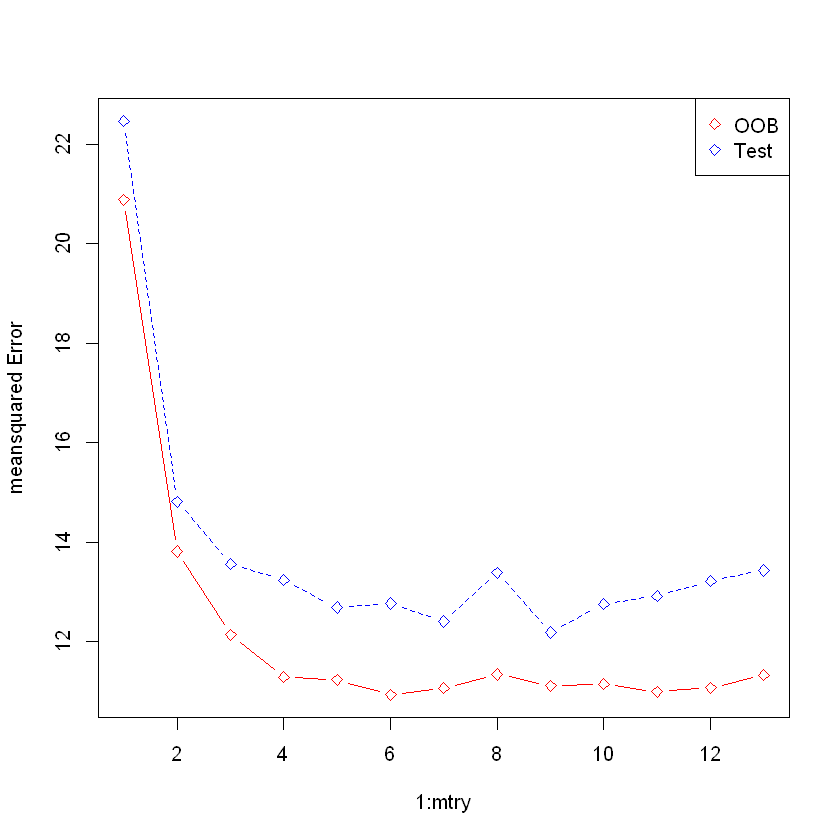

In [10]:
#Plot 

matplot(1:mtry, cbind(test.err,oob.err),pch=23,col=c("red","blue"),type="b",ylab="meansquared Error")
legend("topright",legend= c("OOB","Test"),pch=23,col=c("red","blue")) 